In [32]:
from dotenv import load_dotenv 
import os 
load_dotenv() 

app_key= os.getenv('app_password')

sender= os.getenv('sender')
recipients1= os.getenv('recipients1')

## sending mail

In [33]:
import smtplib
from email.mime.text import MIMEText

# --- Configuration ---

subject = "Email Subject"
body = "This is the body of the text message"
sender = sender # Your Gmail address
recipients = recipients1 # List of people to send to

# IMPORTANT: Replace the placeholder below with the 16-digit App Password you generated
# It will look something like: "abcd efgh ijkl mnop" (without spaces)
app_password = app_key

# --- Function to Send Email ---
def send_email(subject, body, sender, recipients, password):
    """
    Connects to Gmail's SMTP server and sends an email.
    """
    # Create the email message object
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)

    try:
        # Connect to the Gmail server using SSL
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp_server:
            # Log in using your email and the App Password
            smtp_server.login(sender, password)
            # Send the email
            smtp_server.sendmail(sender, recipients, msg.as_string())
        print("Message sent successfully!")
        
    except Exception as e:
        print(f"Failed to send email. Error: {e}")
        print("Please check the following:")
        print("1. Ensure your 'sender' email and 'app_password' are correct.")
        print("2. Check your internet connection.")

# --- Execute the function ---
send_email(subject, body, sender, recipients, app_password)


Message sent successfully!


## email-fetching

In [34]:
import imaplib
import email
from email.header import decode_header
import pandas as pd
import os
from dotenv import load_dotenv

Connect to Gmail IMAP Server

In [35]:
# Load environment variables
load_dotenv()

EMAIL_ACCOUNT = os.getenv("GMAIL_EMAIL")
APP_PASSWORD = os.getenv("app_password")
IMAP_SERVER = "imap.gmail.com"


if  not (EMAIL_ACCOUNT and  APP_PASSWORD and IMAP_SERVER):
    print ("error")

Connect to Gmail IMAP Server

In [36]:
mail = imaplib.IMAP4_SSL(IMAP_SERVER)
mail.login(EMAIL_ACCOUNT, APP_PASSWORD)
mail.select("inbox")  # Select inbox for reading emails

print("✅ Connected and inbox selected")


✅ Connected and inbox selected


Search All Emails

In [37]:
status , message = mail.search(None, 'ALl')
status

'OK'

In [38]:
message[0].split()[10]

b'11'

b'11

here in python b mean byte 

and b'11 means , IMAP sequence number of the email in byte

In [39]:
email_ids= message[0].split() 


Get the Latest 100 Email IDs

In [40]:
num_emails= 100 
latest_email_ids= email_ids[-100:]
len(latest_email_ids)

100

 Parse email

In [ ]:
status, msg_data = mail.fetch(email_ids[0],"(RFC822)" ) ## raw context of the email  in RFC format
status

'OK'

In [45]:
msg = email.message_from_bytes(msg_data[0][1]) ## parse the email 

msg

In [46]:
msg['subject']

'Ulto, finish setting up your new Google Account'

In [47]:
subject, encoding = decode_header(msg["subject"])[0]
subject , encoding


('Ulto, finish setting up your new Google Account', None)

In [48]:
# From and Date
from_ = msg.get("From")
date_ = msg.get("Date")


print("the msg was from :  " ,  from_ ) 

print( " ")
print("the msg deliverd on  : " ,  date_ ) 

the msg was from :   Google Community Team <googlecommunityteam-noreply@google.com>
 
the msg deliverd on  :  Mon, 24 Apr 2023 01:29:59 -0700


In [49]:
 
body = ""
if msg.is_multipart():
    for part in msg.walk():
        if part.get_content_type() == "text/plain" and part.get("Content-Disposition") is None:
            try:
                body = part.get_payload(decode=True).decode()
                break
            except:
                pass

In [50]:
print(body)



Hi Ulto,

Welcome to Google. Your new account comes with access to Google products,  
apps and services.

Here are a few tips to get you started.


Get the most out of your Google Account

We'll send you personalised tips, news and recommendations from Google.

Yes, keep me updated  
<https://notifications.google.com/g/p/APHC3crKsSIpqn0j1PyK9_2wIxFmMV1nesN-20yd937O7rh6KLYDp_lMvlrbbEkr6o-eJCBi23WAepe2v9ryhcsXQxgiLqyCjLh8ETo4qg-2sXbSgo18HmjQKlN6SV-vdTLVTDSjCobyH3poJWBosfNtqFOtVY2hNNGuFFvfaYVW-KuwZOU6gcSRmBEwIqiL1fN7-RTfP2e9h8Y3fcc6P9LwX5D8bpeTPouVBYx5GqjMe9vg9cewrj8qTYvZoe9CRZhvAeaHlKXR83Zjz9k7XNLHhAaKhCJ3caXcYHXl90bIDOKdOsj1A8DgvjhpUqUQLxlPmaarV-Hu-Rtr7MIncdAqFGVCWh8lI1-2haMZ9unXJxtNrG-F-Je0CY6x2Fv-wdXaDyTUqspmQQlQmq1lsli09Egm3X7Kgkx7856QnryhSDCn7-I5qxUqqSY6si94EeBs42sS1e_HYY6quviyTcEpo-aatp9c23c_9O6_g02x1ssnUlG6k78QbifJbw11uhBja78dmqxuzxSXXj-S0i3dM7jeWvKUhx-NQ6npoL9OZAlIXP4zy0uyqCi0SbPhd0oLuhx16JJphb5JzARUkVUZ7dagG2wFO_Ho--8Ish_Y-KRQpJU>

Stay up to date with the Google app

Find qui

## combining all 


In [51]:
import imaplib
import email
from email.header import decode_header
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

EMAIL_ACCOUNT = os.getenv("GMAIL_EMAIL")
APP_PASSWORD = os.getenv("app_password")
IMAP_SERVER = "imap.gmail.com"


if  not (EMAIL_ACCOUNT and  APP_PASSWORD and IMAP_SERVER):
    print ("error")
    
mail = imaplib.IMAP4_SSL(IMAP_SERVER)
mail.login(EMAIL_ACCOUNT, APP_PASSWORD)
mail.select("inbox")  

print("✅ Connected and inbox selected")


status, messages = mail.search(None, "ALL")

if status != "OK":
    print(" No messages found")
else:
    print("✅ Messages fetched")
    email_ids = messages[0].split()
    print(f"📨 Total emails: {len(email_ids)}")




num_emails = 100
latest_email_ids = email_ids[-num_emails:]
print(f"📬 Fetching latest {len(latest_email_ids)} emails...")



✅ Connected and inbox selected
✅ Messages fetched
📨 Total emails: 3086
📬 Fetching latest 100 emails...


In [52]:
emails_list = []

for email_id in reversed(latest_email_ids):
    status, msg_data = mail.fetch(email_id, "(RFC822)")
    
    for response_part in msg_data:
        if isinstance(response_part, tuple):
            msg = email.message_from_bytes(response_part[1])
            
            # Subject decoding
            if not (msg["subject"]): 
                msg['subject']= "No subject"     
                
            subject, encoding = decode_header(msg["subject"])[0]
              

            if isinstance(subject, bytes):
                subject = subject.decode(encoding if encoding else "utf-8")
                
            
            # From and Date
            from_ = msg.get("From")
            date_ = msg.get("Date")
            
            # Body
            body = ""
            if msg.is_multipart():
                for part in msg.walk():
                    if part.get_content_type() == "text/plain" and part.get("Content-Disposition") is None:
                        try:
                            body = part.get_payload(decode=True).decode()
                            break
                        except:
                            pass
            else:
                try:
                    body = msg.get_payload(decode=True).decode()
                except:
                    pass
            
            emails_list.append({
                "date": date_,
                "from": from_,
                "subject": subject,
                "body": body.strip()
            })


In [53]:
emails_df = pd.DataFrame(emails_list)


### output 👇👇

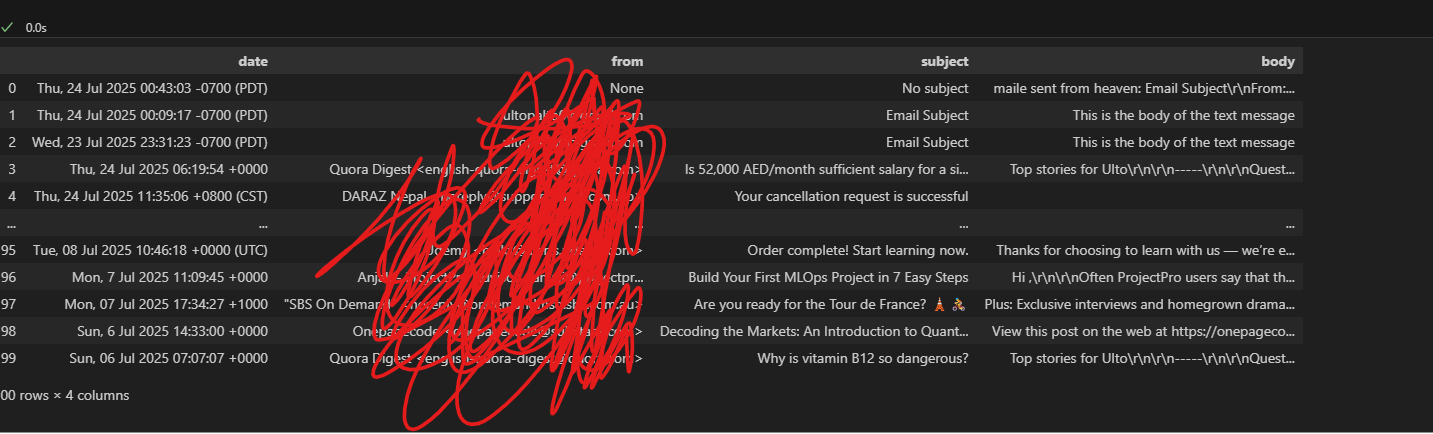

In [54]:
from  IPython.display  import Image
## email_df.head()
Image('media\gmail_extracted.png') 